In [271]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

In [272]:
df_train = pd.read_csv('LoanTrain.csv.xls')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [273]:
df_test = pd.read_csv("LoanTest.csv.xls")

In [274]:
df = df_train.append(df_test)

In [275]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [276]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [277]:
df.shape

(981, 13)

In [278]:
df.drop('Loan_ID' , axis = 1,inplace = True)

In [279]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender', ylabel='count'>

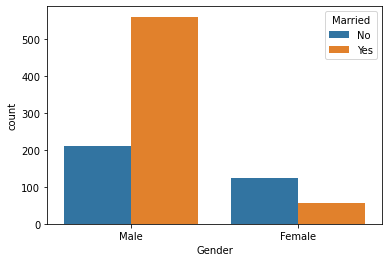

In [280]:
sns.countplot('Gender' , data = df , hue = 'Married')

<AxesSubplot:xlabel='Married', ylabel='count'>

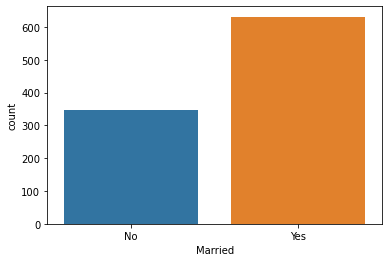

In [281]:
sns.countplot('Married' , data = df)

In [282]:
df[df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [283]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<AxesSubplot:xlabel='Education', ylabel='count'>

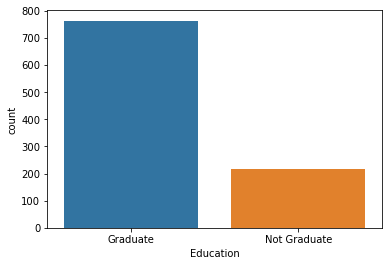

In [284]:
sns.countplot('Education' , data =df)

In [285]:
df['Married'] = df['Married'].fillna('Yes')

In [286]:
df.isnull().sum()

Gender                24
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [287]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

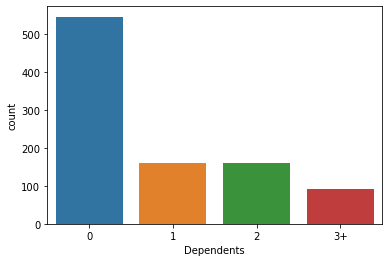

In [288]:
sns.countplot('Dependents' , data = df)

In [289]:
df['Dependents'].dropna().sample(df['Dependents'].isnull().sum(),random_state = 0)

286     0
311    3+
14      2
106     0
55      2
437     0
203     1
260     1
272     0
561     1
31      0
306     0
192     2
357     1
167     0
77      1
508     0
258     0
355    3+
276     0
266     2
603     0
195     0
362     0
378     0
Name: Dependents, dtype: object

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

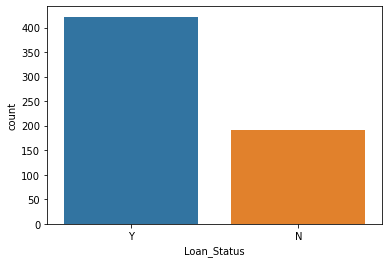

In [290]:
sns.countplot('Loan_Status',data = df)

In [291]:
def sampling(df,variable):
    #df[varianle+'_meanrand'] = df[varaiable].fillna(median)
    df[variable+'_random'] = df[variable]
    random_sample_value = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample_value.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] =random_sample_value

In [292]:
sampling(df,'Dependents')

In [293]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_random
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0


In [294]:
df.isnull().sum()

Gender                24
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Dependents_random      0
dtype: int64

In [295]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Dependents_random  981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 123.5+ KB


In [297]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [298]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Status'].fillna(df['Loan_Status'].mode()[0], inplace=True)

In [299]:
df.drop('Dependents' , axis = 1,inplace = True)

In [300]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_random
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0


In [301]:
df.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
Loan_Status           0
Dependents_random     0
dtype: int64

In [302]:
df["LoanAmount"] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [303]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Dependents_random    0
dtype: int64

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Education          981 non-null    object 
 3   Self_Employed      981 non-null    object 
 4   ApplicantIncome    981 non-null    int64  
 5   CoapplicantIncome  981 non-null    float64
 6   LoanAmount         981 non-null    float64
 7   Loan_Amount_Term   981 non-null    float64
 8   Credit_History     981 non-null    float64
 9   Property_Area      981 non-null    object 
 10  Loan_Status        981 non-null    object 
 11  Dependents_random  981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 115.8+ KB


In [305]:
df['Credit_History'] = df['Credit_History'].astype(int)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Education          981 non-null    object 
 3   Self_Employed      981 non-null    object 
 4   ApplicantIncome    981 non-null    int64  
 5   CoapplicantIncome  981 non-null    float64
 6   LoanAmount         981 non-null    float64
 7   Loan_Amount_Term   981 non-null    float64
 8   Credit_History     981 non-null    int64  
 9   Property_Area      981 non-null    object 
 10  Loan_Status        981 non-null    object 
 11  Dependents_random  981 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 115.8+ KB


In [307]:
df.head(1)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_random
0,Male,No,Graduate,No,5849,0.0,142.51153,360.0,1,Urban,Y,0


<AxesSubplot:xlabel='Gender', ylabel='count'>

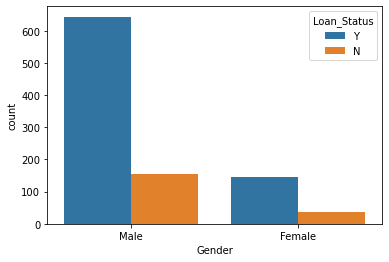

In [308]:
sns.countplot('Gender' , hue = 'Loan_Status' , data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

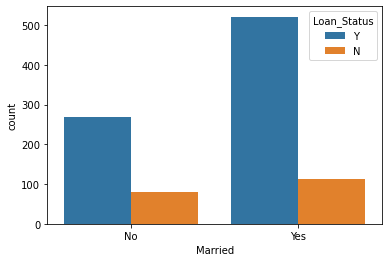

In [309]:
sns.countplot('Married' , hue = 'Loan_Status' , data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

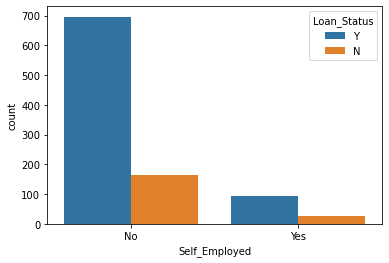

In [310]:
sns.countplot('Self_Employed' , hue = 'Loan_Status' , data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

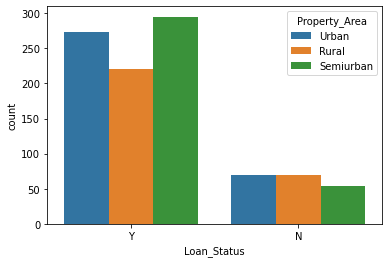

In [311]:
sns.countplot('Loan_Status' , hue = 'Property_Area' , data = df)

In [312]:
df.skew()

ApplicantIncome      7.086961
CoapplicantIncome    6.844109
LoanAmount           2.752055
Loan_Amount_Term    -2.502959
Credit_History      -1.953899
dtype: float64

In [313]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome']+1)

In [314]:
df['LoanAmount'] = np.log(df['LoanAmount'])

In [315]:
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome']+1)

In [316]:
df.skew()

ApplicantIncome     -2.761387
CoapplicantIncome   -0.200221
LoanAmount          -0.215029
Loan_Amount_Term    -2.502959
Credit_History      -1.953899
dtype: float64

In [317]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Dependents_random    0
dtype: int64

In [318]:
df.head(1)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_random
0,Male,No,Graduate,No,8.674197,0.0,4.959423,360.0,1,Urban,Y,0


In [320]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df['Married'] = label.fit_transform(df['Married'])
df['Education'] = label.fit_transform(df['Education'])
df['Self_Employed'] = label.fit_transform(df['Self_Employed'])
df['Property_Area'] = label.fit_transform(df['Property_Area'])
df['Loan_Status'] = label.fit_transform(df['Loan_Status'])

In [321]:
df.head(1)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_random
0,1,0,0,0,8.674197,0.0,4.959423,360.0,1,2,1,0


In [325]:
df['Dependents_random'] = label.fit_transform(df['Dependents_random'])

In [326]:
df.dtypes

Gender                 int64
Married                int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
Dependents_random      int64
dtype: object

In [327]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_random
Gender,1.000000,0.327012,0.040649,0.024719,0.086843,0.203214,0.123655,-0.069625,0.018627,-0.020801,0.009116,0.147552
Married,0.327012,1.000000,0.026211,0.013666,0.063334,0.290880,0.181888,-0.048174,0.021738,0.006372,0.059570,0.348342
Education,0.040649,0.026211,1.000000,-0.010848,-0.177507,0.029734,-0.141727,-0.024001,-0.062416,-0.050685,-0.057680,0.086354
Self_Employed,0.024719,0.013666,-0.010848,1.000000,0.143772,-0.064869,0.095742,-0.031107,0.034485,-0.059678,-0.021323,0.019168
ApplicantIncome,0.086843,0.063334,-0.177507,0.143772,1.000000,-0.342346,0.396604,-0.015362,0.074343,0.006292,-0.016631,0.124566
CoapplicantIncome,0.203214,0.290880,0.029734,-0.064869,-0.342346,1.000000,0.132802,0.002729,-0.016493,-0.020794,0.050104,0.008798
LoanAmount,0.123655,0.181888,-0.141727,0.095742,0.396604,0.132802,1.000000,0.106410,-0.031268,-0.071994,-0.044602,0.136431
Loan_Amount_Term,-0.069625,-0.048174,-0.024001,-0.031107,-0.015362,0.002729,0.106410,1.000000,-0.018377,-0.042209,-0.013822,-0.073300
Credit_History,0.018627,0.021738,-0.062416,0.034485,0.074343,-0.016493,-0.031268,-0.018377,1.000000,0.024342,0.380696,-0.048250
Property_Area,-0.020801,0.006372,-0.050685,-0.059678,0.006292,-0.020794,-0.071994,-0.042209,0.024342,1.000000,0.032649,0.023466


<AxesSubplot:>

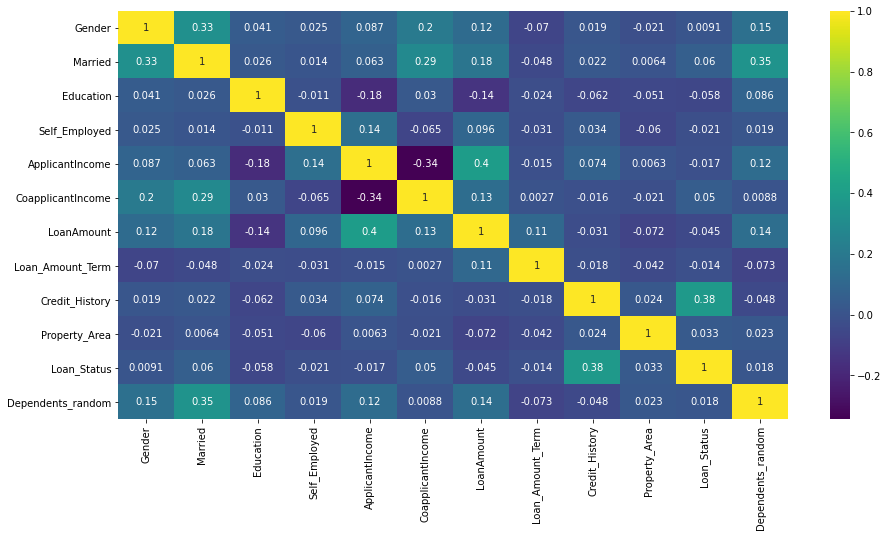

In [329]:
plt.figure(figsize=(15,7.5))
sns.heatmap(df.corr(),annot=True , cmap='viridis')

In [331]:
from scipy.stats import stats

z = np.abs(stats.zscore(df))
df.shape

(981, 12)

In [334]:
df = df[(z < 3).all(axis=1)]

In [336]:
df.shape

(938, 12)

In [337]:
df.skew()

Gender              -1.639092
Married             -0.611844
Education            1.319583
Self_Employed        2.366978
ApplicantIncome      0.545018
CoapplicantIncome   -0.216910
LoanAmount           0.048118
Loan_Amount_Term    -2.150296
Credit_History      -1.925383
Property_Area       -0.080902
Loan_Status         -1.532765
Dependents_random    0.963266
dtype: float64

In [338]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_random
0,1,0,0,0,8.674197,0.000000,4.959423,360.0,1,2,1,0
1,1,1,0,0,8.430327,7.319202,4.852030,360.0,1,0,0,1
2,1,1,0,1,8.006701,0.000000,4.189655,360.0,1,2,1,0
3,1,1,1,0,7.857094,7.765993,4.787492,360.0,1,2,1,0
4,1,0,0,0,8.699681,0.000000,4.948760,360.0,1,2,1,0


In [345]:
from sklearn.linear_model import LogisticRegression , Ridge , Lasso
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [341]:
X = df.drop('Loan_Status' , axis = 1)
y = df['Loan_Status']

In [344]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 0)

In [355]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [356]:
accuracy_score(y_test,y_pred)

0.8

In [363]:
logi = LogisticRegression()
logi.fit(X_train , y_train)

LogisticRegression()

In [364]:
pred = logi.predict(X_test)

In [365]:
accuracy_score(pred,y_test)

0.8064516129032258

In [367]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

[20:44:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:44:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [368]:
xg_pred = xg_reg.predict(X_test)

In [369]:
accuracy_score(xg_pred , y_test)

0.7903225806451613

In [370]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [385]:
svm = SVC(kernel = 'linear' , random_state=0)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [386]:
svmpreds = svm.predict(X_test)

In [387]:
accuracy_score(svmpreds,y_test)

0.8096774193548387